In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it_prior_mv.json"
script_name = "../scripts/run_fineweb1B_adam_fista_momentum.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

Some files are missing: 
{'attn_fista_adamw-lr-0.001-constant-linear-5371fb4f50318280914f599ec53e22dc.json', 'attn_fista_adamw-lr-0.001-constant-linear-12c792d7d20b25a7a839d2e630ec149a.json', 'attn_fista_adamw-lr-0.001-constant-linear-7a3f19fe2715a7fd44bd3980ad74e97c.json', 'attn_fista_adamw-lr-0.001-constant-linear-ada16ba1d699f5ba25fcc66e53b425b6.json', 'attn_fista_adamw-lr-0.001-constant-linear-b9c922f8d5bd5164ee84cdadf7ad1894.json', 'attn_fista_adamw-lr-0.001-constant-linear-a458f33f0d1fd70831052c4cc408ab0b.json', 'attn_fista_adamw-lr-0.001-constant-linear-2f1414b6ab0b5268ce7f8f9ddee22ece.json', 'attn_fista_adamw-lr-0.001-constant-linear-5bc421ee49a02fa2b7bfd7f38eb96b29.json', 'attn_fista_adamw-lr-0.001-constant-linear-502bc3acfe0906054236f65e8697f3f2.json', 'attn_fista_adamw-lr-0.001-constant-linear-004661ba08c1843483db4cf6e0fb9f86.json', 'attn_fista_adamw-lr-0.001-constant-linear-373b8d8658926dd65cb962387b2c786a.json', 'attn_fista_adamw-lr-0.001-constant-linear-d69a701dceff2afc24

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,attn_momentum,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.000694,3.989033,3.989033,294.000,191.000,199.910070,20,prior_mv,0.001,False,0.5,0.5,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.982838,3.970553,3.970553,197.000,123.500,122.736588,20,prior_mv,0.001,False,0.1,0.1,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.525904,4.514731,4.514731,6368.000,5056.000,4449.108031,20,prior_mv,0.001,False,0.75,5,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.002184,3.990592,3.990592,390.000,308.000,302.269027,20,prior_mv,0.001,False,0.75,1,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.246044,4.234925,4.234925,27.875,22.375,21.081027,20,prior_mv,0.001,False,0.1,0.01,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5', '1', '5'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:372: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


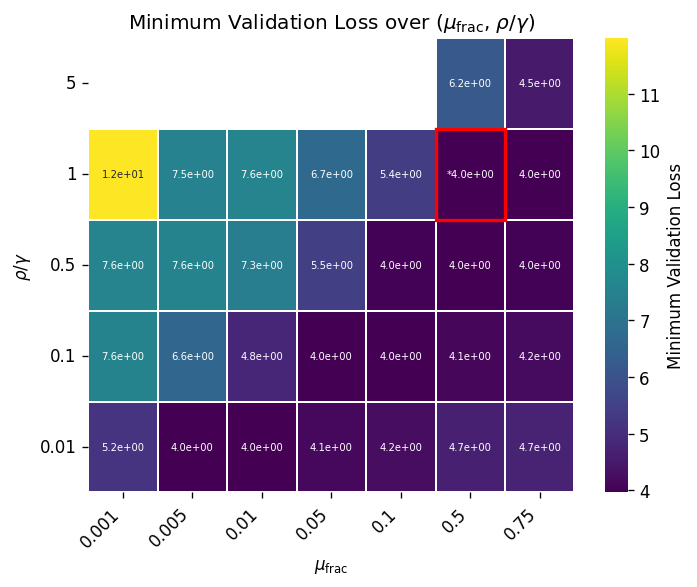

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:372: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


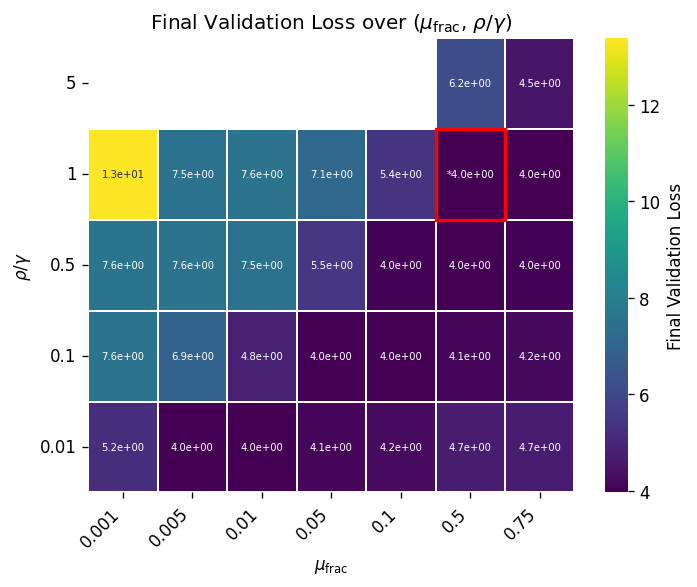

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top10 = df.dropna(subset=cols).nsmallest(10, "min_val_loss")[cols].reset_index(drop=True)
print(top10)

   min_val_loss   kq_max mu_frac rho_over_lr
0      3.964207   804.00     0.5           1
1      3.964882   756.00   0.005        0.01
2      3.967524   732.00    0.05         0.1
3      3.969220   178.00    0.01        0.01
4      3.970553   197.00     0.1         0.1
5      3.989033   294.00     0.5         0.5
6      3.990592   390.00    0.75           1
7      4.014805  3328.00     0.1         0.5
8      4.022688   179.00    0.75         0.5
9      4.104201    37.75     0.5         0.1


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:372: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


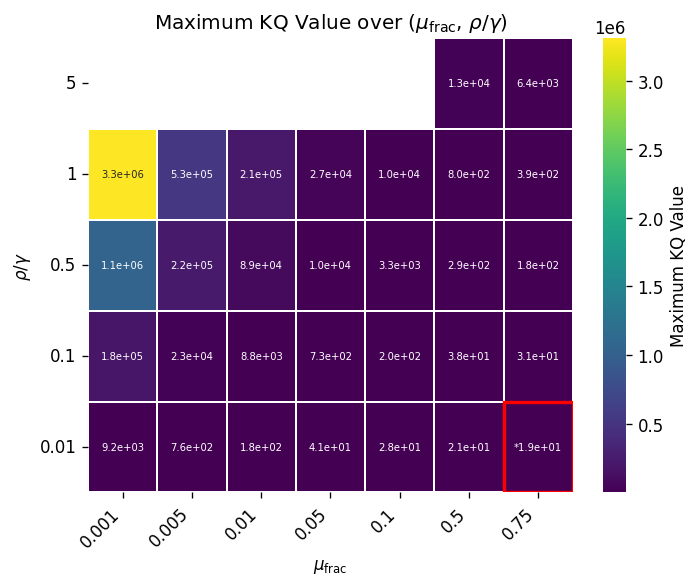

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:372: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:374: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


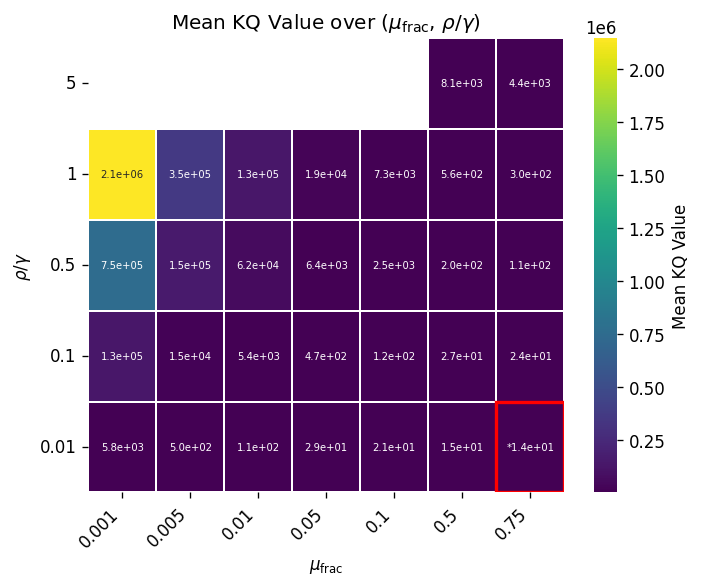

In [9]:
plot_heatmat_grid(df, value="kq_mean")